**Функции**
===
Функции в языке Python создаются с помощью новой инструкции **def**. В отличие от функций в компилирующих языках программирования, таких как C, **def** относится к классу
исполняемых инструкций – функция не существует, пока интерпретатор
не доберется до инструкции **def** и не выполнит ее. Фактически вполне допустимо (а иногда даже полезно) вкладывать инструкции **def** внутрь инструкций **if**, циклов **while** и даже в другие инструкции **def**.

**def** создает объект и присваивает ему имя. Когда интерпретатор Python
встречает и выполняет инструкцию **def**, он создает новый объект-функцию
и связывает его с именем функции. Как и в любой другой операции присваивания, имя становится ссылкой на объект-функцию. 

Инструкции **def** не интерпретируются, пока они не будут достигнуты и выполнены потоком выполнения, а программный код внутри инструкции **def** не выполняется, пока функция не будет вызвана позднее.
  
    othername = func       # Связывание объекта функции с именем
    othername()            # Вызов функции

Объект-функция может быть связан с несколькими именами, может сохраняться в списке и так далее.

 Кроме того, к функциям можно прикреплять различные атрибуты, определяемые пользователем, для сохранения каких-либо данных.



Функция в **python** - объект, принимающий аргументы и возвращающий значение.

**Объявление функции**

        def <название_функции> ( <параметр1>,<параметр2>,...,<параметрN>):

            <Оператор1>
            <Оператор2>
            ....
            <ОператорN>
            return [Выражение]
            
Функция может быть любой сложности и **возвращать любые объекты** (списки, кортежи, и даже функции!)

Функция может и не заканчиваться инструкцией return, при этом функция вернет значение **None**:

In [2]:
def func():
    pass

print(func())

None


In [23]:
def func(a, b):
    return a*b

print(func(2,3), func("Hi",3))

6 HiHiHi


Пример выше отлично демонстрирует полиморфизм.

Единственная функция может автоматически применяться к целой категории типов объектов. Пока объекты поддерживают ожидаемый интерфейс (или протокол), функция сможет обрабатывать
их. То есть, если объект, передаваемый функции, поддерживает ожидаемые
методы и операторы выражений, он будет совместим с логикой функции.

В случае с примером выше, любые два
объекта, поддерживающие оператор \*, смогут обрабатываться функцией, и неважно, что они из себя представляют и когда были созданы.

 Если функции будут переданы объекты, которые не поддерживают ожидаемый интерфейс, интерпретатор обнаружит ошибку при выполнении выражения \* и автоматически возбудит исключение.

**Возвращаемые значения**

можно возвращать несколько значений:

In [5]:
def powers(x):
    return x**2, x**3, x**4 #благодаря наличию типа кортеж возможно возвращать несколько параметров

print(powers(2))

print(powers(3))

(4, 8, 16)
(9, 27, 81)


Как упоминалось, возвращать мы можем все, даже функцию:

In [45]:
def f1():
    print("f1")
    def f2():
        print("Hello!")
    return f2

print(f1)
print(f1())
print(f1()())

<function f1 at 0x0000019045523510>
f1
<function f1.<locals>.f2 at 0x0000019045523E18>
f1
Hello!
None


Параметры функции
-------

Функция может принимать произвольное количество параметров или не принимать их вовсе. Также есть возможность объявлять функции с произвольным числом параметров, функции с позиционными и именованными параметрами, обязательными и необязательными.

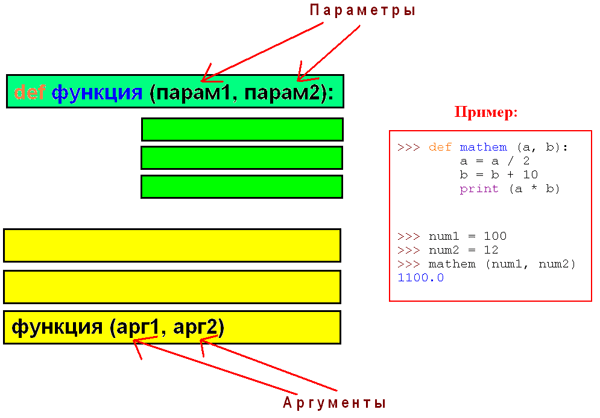
_____________
1. Передача в функции **неизменяемых типов** (str, int, tuple, frozenset)
   Передача происходит по значению, т.е внешняя переменная не зависит от внутренней (локальной) функции


In [6]:
def func(arg, arg2):
    print(arg, arg2)
    arg = "Inside"
    arg2 = 4
    print(arg,arg2)
    print("=========")


var1, var2 = "Outside", 10
func(var1,var2)
print(var1, var2) # значение переменной вне функции не изменилось

Outside 10
Inside 4
Outside 10


**Пример**

Выведем зарплаты  в порядке возрастания, но исходные данные не будем менять

In [8]:
salaries = (400, 300, 250, 600)

def f(salaries):
    for (i, salary) in enumerate(sorted(salaries)):
        print(f"{i+1} salary is {salary}")

f(salaries)

1 salary is 250
2 salary is 300
3 salary is 400
4 salary is 600


_______________
2. Передача в функции **изменяемых типов** (list, dict, set)
   Передача параметров изменяемых типов происходит по ссылке, т.е изменения в функции влияют на внешние переменные
   
**Пример**

Возьмем опять зарплату. Если она ниже прожиточного минимума (<150$) - изменим значение до минимума.

In [22]:
salaries = [400, 300, 100,  250, 600]
#salaries = [150 if i<150 else i for i in salaries]
def f(salaries):
     for i in range(len(salaries)):
            if salaries[i]<150: salaries[i] = 150
        

f(salaries)
print(salaries)

[400, 300, 150, 250, 600]


___________
3. **Именованные параметры**

In [28]:
def describe_person(first_name, last_name, age):
    print(f"First name: {first_name.title()}")
    print(f"Last name: {last_name.title()}"  )
    print(f"Age: {age}" )

describe_person(age = 71, first_name = 'brian', last_name = 'kernighan')

First name: Brian
Last name: Kernighan
Age: 71


____________
4. **Необязательные параметры** (идут после  обязательных):

In [8]:
def describe_person(first_name, last_name, age = 10):
    print(f"First name: {first_name.title()}")
    print(f"Last name: {last_name.title()}"  )
    print(f"Age: {age}" )

describe_person(first_name='brian', last_name='kernighan')
describe_person('brian', 'kerni')

First name: Brian
Last name: Kernighan
Age: 10
First name: Brian
Last name: Kerni
Age: 10


_________
 5. **Переменное число параметров**
    
    Функции могут использовать специальный параметр, имени которого предшествует один или два символа *, для объединения произвольного числа дополнительных аргументов в коллекцию.
    
\*args используется для неименованных аргументов, с которыми можно работать как со списком;

\*\*kwargs используется для именованных аргументов, с которыми можно работать как со словарём;

Как было сказано, \*args нужен, когда необходимо передать неизвестное количество неименованных аргументов. Если поставить * перед именем, это имя будет принимать не один аргумент, а несколько. Аргументы передаются как кортеж и доступны внутри функции под тем же именем, что и имя параметра, только без *. 

In [34]:
def adder(*nums):
    sum = 0
    
    for n in nums:
        sum += n

    print("Sum: ", sum)

adder(1,2)
adder(3,2,1,7,6)

Sum:  3
Sum:  19


Комбинация ** дает похожий результат, но применяется при передаче именованных аргументов – в этом случае аргументы будут собраны в новый словарь,
который можно обрабатывать обычными инструментами, предназначенными
для работы со словарями. В определенном смысле форма ** позволяет преобразовать аргументы, передаваемые по именам, в словари, которые можно будет обойти с помощью метода keys, итераторов словарей и так далее:

In [35]:
def f(**args): print(args)
    
f()
f(name = "Alis", age = 4)

{}
{'name': 'Alis', 'age': 4}


если вы хотите использовать и \*args, и \*\*kwargs, то это делается так: 

    func(fargs, *args, **kwargs) # порядок следования аргументов важен;

In [37]:
def f(a, *pargs, **kargs): print(a, pargs, kargs)

f(1, 2, 3, 10, x=1, y=2)

1 (2, 3, 10) {'x': 1, 'y': 2}


**Параметрами функции могут быть любые объекты, даже функции**:

In [2]:
def add(a, b):
    return a + b

def math_op(a, b, func = add):
    return func(a,b)

def subtract(a, b):
    return a - b

print(math_op(2, 2))

math_op(2, 2, subtract)

4


0

**Пример** 

написать функцию, которая реализовывает  поиск либо минимального, либо максимального значение среди произвольного количества аргументов

In [13]:
def minmax(func, *args):
    *res = args[0]
    
    for arg in args[1:]:
        if func(arg, res):
            res = arg
    return res

def lessthan(x, y): return x < y           
def grtrthan(x, y): return x > y


print(minmax(lessthan, [4, 2, 1, 5, 6, 3]))  
print(minmax(grtrthan, 4, 2, 1, 5, 6, 3))

SyntaxError: starred assignment target must be in a list or tuple (cell_name, line 5)

**Извлечение аргументов из коллекции**


Форму * можно также использовать в вызовах
функций. В этом случае данная форма передачи аргументов имеет противоположный смысл по сравнению с применением этой формы в определениях
функций – она распаковывает, а не создает коллекцию аргументов. Например,
можно передать в функцию четыре аргумента в виде кортежа и позволить интерпретатору распаковать их в отдельные аргументы:

In [40]:
def func(a, b, c, d): print(a, b, c, d)

args = (1, 2)
args += (3, 4)
print(args)
func(*args)

(1, 2, 3, 4)
1 2 3 4


In [16]:
test_list = [1, 2, [3, 4, 5], 6]
next_list = [[2,3],[7,5],8, test_list]
print(next_list)
next_list = [[2,3],[7,5],8, *test_list]
print(next_list)

[[2, 3], [7, 5], 8, [1, 2, [3, 4, 5], 6]]
[[2, 3], [7, 5], 8, 1, 2, [3, 4, 5], 6]


In [19]:
list(zip(test_list,next_list))

[(1, [2, 3]), (2, [7, 5]), ([3, 4, 5], 8), (6, 1)]

Пример использования функций в трехместном операторе:

In [32]:
def product(a, b):
    
    """Return a foobang 
    Optional plotz says to frobnicate the bizbaz first.
    """ 
    return a * b
def summ(a, b):
    return a + b


flag = False
print((product if flag else summ)(2,10))

12


 Коментарий к функциям
-----------
 
 
 *Пишите документацию для всех модулей, функций, классов, методов, которые объявлены как public. Строки документации необязательны для не-public методов, но лучше написать, что делает метод. Комментарий нужно писать после строки с **def**.*
 
 PEP 257 (https://www.python.org/dev/peps/pep-0257/) объясняет, как правильно и хорошо документировать. Заметьте, очень важно, чтобы закрывающие """ стояли на отдельной строчке. А еще лучше, если перед ними будет ещё и пустая строка, например:

In [ ]:
"""Return a foobang 
Optional plotz says to frobnicate the bizbaz first.

""" 

#??product
#?product
#help(product)

Анонимные функции: lambda
========

Помимо инструкции **def** в языке Python имеется возможность создавать объекты функций в форме выражений.
Подобно инструкции **def**
это выражение создает функцию, которая будет вызываться позднее, но в отличие от инструкции def, выражение возвращает функцию, а не связывает ее
с именем. Именно поэтому **lambda**-выражения иногда называют анонимными
(то есть безымянными) функциями. На практике они часто используются, как
способ получить встроенную функцию или отложить выполнение фрагмента
программного кода.

В общем виде **lambda**-выражение состоит из ключевого слова **lambda**, за которым следуют один или более аргументов (точно так же, как список аргументов
в круглых скобках в заголовке инструкции **def**) и далее, вслед за двоеточием,
находится выражение:

            lambda argument1, argument2,... argumentN : выражение, использующее аргументы

В качестве результата **lambda**-выражения возвращают точно такие же объекты
функций, которые создаются инструкциями **def**, но здесь есть несколько различий, которые делают **lambda**-выражения удобными в некоторых специализированных случаях:

- **lambda** – это выражение, а не инструкция. По этой причине ключевое слово **lambda** может появляться там, где синтаксис языка Python не позволяет использовать инструкцию **def**, – внутри литералов или в вызовах функций, например. Кроме того, **lambda**-выражение возвращает значение (новую функцию), которое при желании можно присвоить переменной, в противовес инструкции **def**, которая всегда связывает функцию с именем в заголовке, а не возвращает ее в виде результата.

- Тело **lambda** – это не блок инструкций, а единственное выражение. Тело **lambda**-выражения сродни тому, что вы помещаете в инструкцию **return** внутри определения **def**, – вы просто вводите результат в виде выражения вместо его явного возврата. Вследствие этого ограничения **lambda**-выражения менее универсальны, чем инструкция **def** – в теле **lambda**-выражения может быть реализована только логика, не использующая такие инструкции, как **if** (но можно трехместный оператор). Такая реализация предусмотрена заранее – она ограничивает возможность создания большого числа уровней вложенности программ: lambda-выражения предназначены для создания простых функций, а инструкции **def** – для решения более сложных задач.


In [34]:
def func(a, b): return a + b

f = lambda a, b: a + b

print(func(2,3), f(2,3))

5 5


В lambda-выражениях точно так же можно использовать аргументы со значениями по умолчанию:

In [7]:
x = (lambda a='fee', b='fie', c='foe': a + b + c)
x('wee')

'weefiefoe'

**Когда можно использовать lambda-выражения?**

Вообще говоря, **lambda**-выражения очень удобны для создания очень маленьких функций, к тому же они позволяют встраивать определения функций
в программный код, который их использует. Они не являются предметом первой необходимости (вы всегда сможете вместо них использовать инструкции
def), но они позволяют упростить сценарии, где требуется внедрять небольшие
фрагменты программного кода.

**lambda**-выражения наиболее полезны в качестве сокращенного варианта инструкции **def**, когда необходимо вставить маленькие фрагменты исполняемого программного кода туда, где использование инструкций недопустимо.

например в элемент списка:

In [14]:
L = [lambda x: x**2,   
lambda x: x**3, 
lambda x: x**4] 

print(L[0](2))

for f in L: print(f(3), end = ' ')

4
9 27 81 

In [15]:
key = 'got'
>>> {'already': (lambda: 2 + 2),
    'got': (lambda: 2 * 4),
    'one': (lambda: 2 ** 6)}[key]()

8

В данном случае, когда интерпретатор создает словарь, каждое из вложенных
**lambda**-выражений генерирует и оставляет после себя функцию для последующего использования – обращение по ключу извлекает одну из этих функций,
а круглые скобки обеспечивают вызов извлеченной функции.

Тоже самое  с функцией:

In [17]:
def f1(): return 2 + 2
def f2(): return 2 * 4
def f3(): return 2 ** 6

key = 'already'
{'already': f1, 'got': f2, 'one': f3}[key]()

4

In [36]:
pairs = [(1, 'one'), (2, 'two'), (3, 'three'), (4, 'four')]
pairs.sort(key=lambda pair: pair[1])
pairs

[(4, 'four'), (1, 'one'), (3, 'three'), (2, 'two')]

In [39]:
names = ['David Beazley', 'Brian Jones',
         'Raymond Hettinger', 'Ned Batchelder']
sorted(names, key=lambda name: name.split()[-1].lower())

['Ned Batchelder', 'David Beazley', 'Raymond Hettinger', 'Brian Jones']

 Если внутри **lambda**-выражения потребуется выполнять циклы, их
можно заменить вызовами функции **map** и генераторами списков.

Функция **map** ожидает получить в первом аргументе функцию, поэтому здесь
часто можно встретить **lambda**-выражения:

In [19]:
counters = list(range(5))
list(map((lambda x: x + 3), counters))

[3, 4, 5, 6, 7]

In [21]:
list(map(pow, [1, 2, 3], [2, 3, 4])) # 1**2, 2**3, 3**4

[1, 8, 81]

При передаче нескольких последовательностей функция map предполагает, что
ей будет передана функция, принимающая N аргументов для N последовательностей. Здесь функция pow при каждом вызове принимает от функции map два
аргумента – по одному из каждой последовательности.

In [1]:
list(map(lambda x, y: x + 3*y, [1, 2, 3], [2, 3, 4]))

[7, 11, 15]

**Захват переменных в анонимных функциях**

Вы определили анонимную функцию, используя **lambda**, но вы также хотите захватить (запомнить) значения некоторых переменных во время определения.

Пример:


In [41]:
x = 10
a = lambda y: x + y
x = 20
b = lambda y: x + y

In [42]:
print(a(10),b(10))

30 30


Проблема в том, что значение **x**, используемое в **lambda**-выражении, является свободной переменной, которая связывается во время выполнения (в рантайме), а не во время определения. Так что значение **x** в **lambda**-выражениях будет таким, каким ему случится быть во время выполнения.

Если же вы хотите, чтобы анонимная функция захватывала значение во время определения и сохраняло его, используйте значение по умолчанию:

In [43]:
x = 10
a = lambda y, x = x: x + y
x = 20
b = lambda y, x = x: x + y

In [44]:
print(a(10),b(10))

20 30
